<h1> PROJET BIG DATA <h1>

<h3> 1.1 Importation des données</h3>

<h4> Importation des librairies <h4>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

<h4> Importation du dataset <h4>

In [10]:
# Import as a panda dataframe
dataframe=pd.read_csv("public_dat/store_train.data", sep=' ')
target=pd.read_csv("public_dat/store_train.solution", sep=' ')
dataframe['Target']=target

# Drop entries with missing values
dataframe = dataframe.dropna()
dataframe['Date']=pd.to_datetime(dataframe['Date'],format='%Y-%m-%d')

#Until we find something better, we drop the date column and the Student holiday column
dataframe=dataframe.drop('Date', axis=1)
dataframe=dataframe.drop('Student_holiday', axis=1)

# Display data
print('The dataset is composed by %d lignes and %d columns ' %dataframe.shape) 

# We then remove the Target column of the dataset
#target=dataframe['Target']
#dataframe=dataframe.drop('Target', axis=1)


The dataset is composed by 712045 lignes and 7 columns 


In [3]:
dataframe.describe()

,store_ID,Day_of_week,Amount_customers,Store_open,Promo,School_holiday,Target
count,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,0.830174,0.381519,0.178543,5776.336748
std,321.898476,1.996580,464.360651,0.375480,0.485760,0.382970,3851.273075
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3729.000000
50%,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7859.000000
max,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,41551.000000


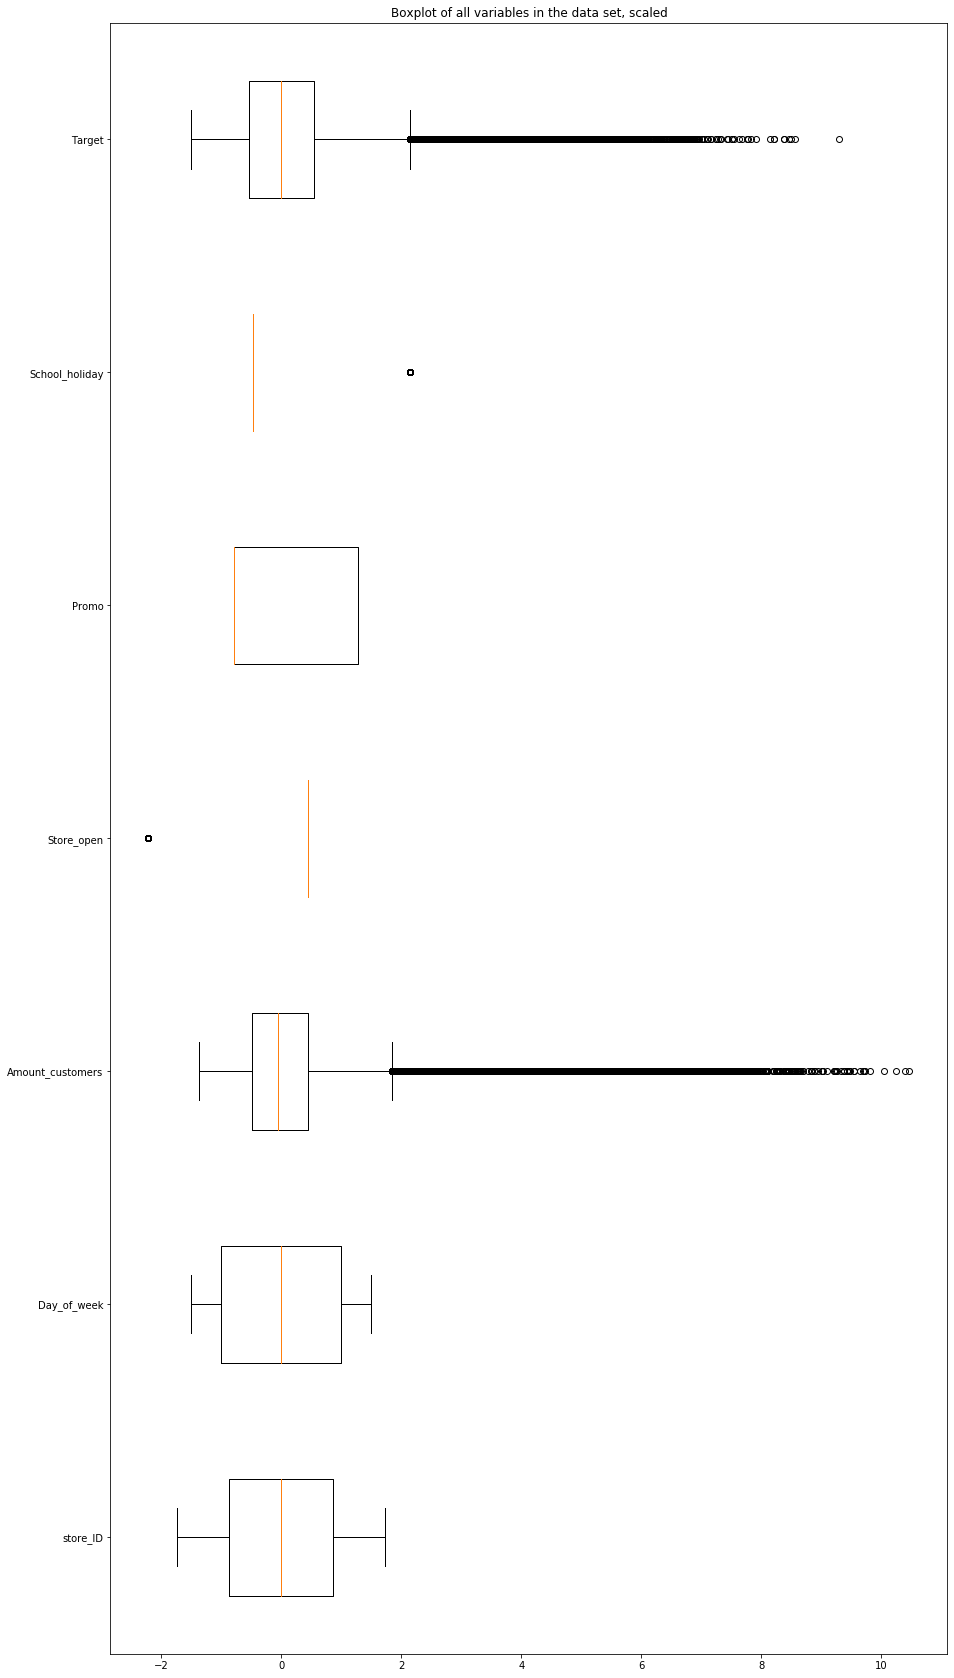

In [4]:
normdataset=scale(dataframe)
plt.figure(figsize=(15,30))
plt.boxplot(normdataset,vert= False, labels=dataframe.columns)
plt.title("Boxplot of all variables in the data set, scaled")
plt.show()

<h3> 2.1 Random Forest <h3>

In [5]:
# Compute cross-validation score
nb_trials = 5
score = []
for i in range(nb_trials):
    dataframe_test=dataframe.drop(np.random.choice(dataframe.index, 711045, replace=False))
    target_test=dataframe_test['Target']
    dataframe_test=dataframe_test.drop('Target', axis=1)    
    Xtrain, Xtest, ytrain, ytest = train_test_split(dataframe_test, 
                                                    target_test, 
                                                    random_state = 1, 
                                                    test_size=0.3)
    spam_RF = RandomForestClassifier(n_estimators=200, criterion='entropy')
    spam_RF.fit(Xtrain,ytrain);
    score += [spam_RF.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))


***** done!
Average generalization score: 0.16933333333333334
Standard deviation: 0.01103529690483124


<h3> 2.1 XGBoost <h3>

In [6]:

# Compute cross-validation score
nb_trials = 5

score = []
for i in range(nb_trials):
    dataframe_test=dataframe.drop(np.random.choice(dataframe.index, 711045, replace=False))
    target_test=dataframe_test['Target']
    dataframe_test=dataframe_test.drop('Target', axis=1)    
    Xtrain, Xtest, ytrain, ytest = train_test_split(dataframe_test, 
                                                    target_test, 
                                                    random_state = 1, 
                                                    test_size=0.3)
    xgbC = XGBClassifier(n_estimators=200)
    xgbC.fit(Xtrain,ytrain)
    score += [xgbC.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))


***** done!
Average generalization score: 0.16399999999999998
Standard deviation: 0.02026491220476088


<h3> 2.1 Neural Network <h3>

In [12]:
dataframe_test=dataframe.drop(np.random.choice(dataframe.index, 711045, replace=False))
target_test=dataframe_test['Target']
dataframe_test=dataframe_test.drop('Target', axis=1)    
Xtrain, Xtest, ytrain, ytest = train_test_split(dataframe_test, 
                                                target_test, 
                                                random_state = 1, 
                                                test_size=0.3)

param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xtrain, ytrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xtest,ytest)

# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xtest)
# matrice de confusion
table=pd.crosstab(ytrain,ytest)
print(table)

Meilleur score = 0.197517, Meilleur paramètre = {'hidden_layer_sizes': (8,)}
Empty DataFrame
Columns: []
Index: []


/home/antoine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
